# Compute global annual anomalies

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import importlib
import processing_functions
from processing_functions import *

## Find models where we have global annual means, but no anomalies:

In [2]:
model_mean_names = [ f.name for f in os.scandir('../Processed_data/Global_annual_means/') if f.is_dir() and f.name !='.ipynb_checkpoints']
model_anom_names = [ f.name for f in os.scandir('../Processed_data/Global_annual_anomalies/') if f.is_dir() and f.name !='.ipynb_checkpoints']

no_anoms_yet = set(model_mean_names)-set(model_anom_names)
for model in no_anoms_yet:
    mean_exp = [ f.name for f in os.scandir('../Processed_data/Global_annual_means/' + model) if f.is_dir() and f.name !='.ipynb_checkpoints']
    print(model, ' ', mean_exp)
    
    

KACE-1-0-G   ['ssp585', 'piControl', 'abrupt-4xCO2', 'ssp245', 'historical', '1pctCO2', 'ssp370', 'ssp126']
FIO-ESM-2-0   ['ssp585', 'piControl', 'abrupt-4xCO2', 'ssp245', 'historical', '1pctCO2', 'ssp126']


## Find models where we have some anomalies, but are missing some experiments/members

In [3]:
for model in model_anom_names:
    #print(model)
    mean_exp = [ f.name for f in os.scandir('../Processed_data/Global_annual_means/' + model) if f.is_dir() and f.name not in ['.ipynb_checkpoints', '.DS_Store']]
    anom_exp = [ f.name for f in os.scandir('../Processed_data/Global_annual_anomalies/' + model) if f.is_dir() and f.name not in ['.ipynb_checkpoints', '.DS_Store']]
    diff = set(mean_exp) - set(anom_exp)
    if len(diff)>0:
        print(model, 'has no anomalies for', diff)
    other_exp = set(mean_exp) - diff
    for exp in other_exp: # do we have all members?
        # compare number of files in folders
        anom_exp_memberfiles = [ f.name for f in os.scandir('../Processed_data/Global_annual_anomalies/' + model + '/' + exp) if f.name not in ['.ipynb_checkpoints', '.DS_Store']]
        anom_exp_members = [file.rsplit('_')[2] for file in anom_exp_memberfiles ]
        mean_exp_memberfiles = [ f.name for f in os.scandir('../Processed_data/Global_annual_means/' + model + '/' + exp) if f.name not in ['.ipynb_checkpoints', '.DS_Store']]
        mean_exp_members = [file.rsplit('_')[2] for file in mean_exp_memberfiles]
        diff_members = set(mean_exp_members) - set(anom_exp_members)
        if len(diff_members)>0:
            print('Anomalies not computed for members', diff_members, 'of', model, exp)

# NB: for piClim experiments we don't compute anomalies here


NorESM2-LM has no anomalies for {'piClim-4xCO2', 'piClim-histall', 'piClim-control'}
ACCESS-ESM1-5 has no anomalies for {'piClim-4xCO2', 'piClim-control'}
HadGEM3-GC31-LL has no anomalies for {'piClim-4xCO2', 'piClim-histall', 'piClim-control'}
CESM2 has no anomalies for {'piClim-4xCO2', 'piClim-control'}
CESM2-WACCM has no anomalies for {'piClim-control'}
MPI-ESM1-2-LR has no anomalies for {'piClim-4xCO2', 'fixedSST_from_Angshuman', 'piClim-control'}
GISS-E2-1-G has no anomalies for {'piClim-4xCO2', 'piClim-histall', 'piClim-control'}
CNRM-CM6-1 has no anomalies for {'piClim-4xCO2', 'piClim-histall', 'piClim-control'}
EC-Earth3-AerChem has no anomalies for {'piClim-control'}
MRI-ESM2-0 has no anomalies for {'piClim-4xCO2', 'piClim-control'}
EC-Earth3 has no anomalies for {'piClim-4xCO2', 'piClim-histall', 'piClim-control'}
Anomalies not computed for members {'r10i1p1f2', 'r6i1p1f2', 'r27i1p1f2', 'r28i1p1f2', 'r4i1p1f2', 'r26i1p1f2', 'r22i1p1f2', 'r8i1p1f2', 'r18i1p1f2', 'r21i1p1f2', '

In [4]:
idealised_exp = ['abrupt-4xCO2', 'abrupt-2xCO2', 'abrupt-0p5xCO2', '1pctCO2']
hist_exp = ['historical', 'hist-GHG', 'hist-aer', 'hist-nat']
ssp_exp = ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

var_list = ['tas', 'rlut', 'rsut', 'rsdt']

## Choose model:

In [5]:
model_mean_names.sort()

In [6]:
model_mean_names;

In [7]:
importlib.reload(processing_functions)
from processing_functions import *

In [8]:
#model = model_mean_names[56]
#model = 'FGOALS-g3'
model = 'GISS-E2-1-G'
#model = 'HadGEM3-GC31-LL'
#model = 'IPSL-CM6A-LR'
#model = 'CNRM-CM6-1'
print(model)

GISS-E2-1-G


## Load branch info. Eventual automatic corrections will be printed

In [9]:
#branch_time_file = '../Processed_data/Branch_times/' + model + '_branch_times.txt'
#table = pd.read_table(branch_time_file,index_col=0, sep = ' ')

branch_time_file = '../Processed_data/Branch_times/' + model + '_branch_times.csv'
table = pd.read_table(branch_time_file,index_col=0, sep = ',')

#pd.set_option('display.max_rows', None)
pd.set_option('display.min_rows', 15)
#display(table)
pd.set_option('display.max_rows', None)
branch_info_corrections(table);


## Print available experiments and calendar information

In [10]:
experiments = list(table['exp'].unique())
print('Available experiments for this model:')
for exp in experiments:
    exp_df = table.loc[table['exp'] == exp]
    print(exp,':', len(exp_df), 'member(s)')
    #display(exp_df)

model_calendars = find_model_calendars(model)
unique_calendars = model_calendars['calendar'].unique()
if len(unique_calendars) == 1:
    print('All experiments use the calendar', unique_calendars)
else:
    for calendar in unique_calendars:
        ncals = np.multiply(model_calendars['calendar'] == calendar, 1).sum()
        print(ncals, 'experiments use the calendar', calendar)

#exp = 'piControl'
#exp = 'abrupt-4xCO2'
#exp = 'abrupt-2xCO2'
#exp = 'abrupt-0p5xCO2'
#exp = '1pctCO2'

#exp = 'historical'
#exp = 'hist-GHG'
#exp = 'hist-aer'
#exp = 'hist-nat'
#exp = 'ssp119'
#exp = 'ssp126'
#exp = 'ssp245'
#exp = 'ssp370'
#exp = 'ssp585'

Available experiments for this model:
1pctCO2 : 4 member(s)
abrupt-0p5xCO2 : 1 member(s)
abrupt-2xCO2 : 1 member(s)
abrupt-4xCO2 : 1 member(s)
hist-GHG : 5 member(s)
hist-aer : 5 member(s)
hist-nat : 10 member(s)
historical : 5 member(s)
piClim-4xCO2 : 1 member(s)
piClim-control : 1 member(s)
piClim-histall : 3 member(s)
piControl : 1 member(s)
ssp126 : 1 member(s)
ssp245 : 5 member(s)
ssp585 : 4 member(s)
All experiments use the calendar ['360_day']


## For all models except EC-Earth3, which is treated at the end of this notebook:


 HadGEM3-GC31-LL abrupt-4xCO2 r1i1p1f3
piControl_start_year 1850
piControl_timeunit_start_year 1850
years_since_piControl_start =  0


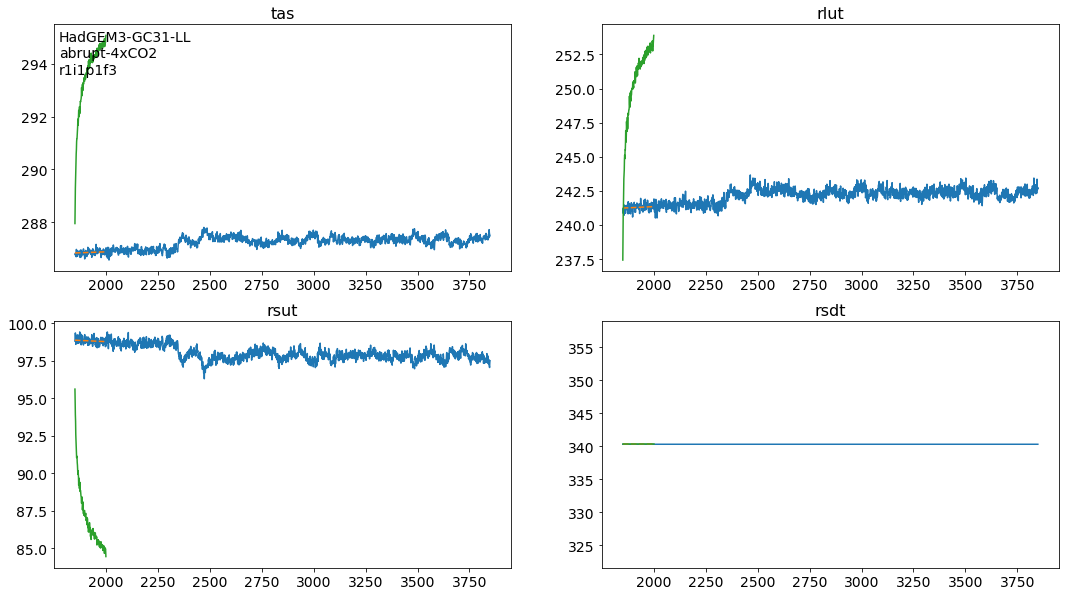

In [11]:
#importlib.reload(processing_functions)
#from processing_functions import *

columnames_branchinfo_overview = ['exp', 'member', 'piControl branch time (days)', 'nearest time in table (days)', 'days difference', 'piControl branch time (year)']
branchinfo_overview_df = pd.DataFrame(columns = columnames_branchinfo_overview)

piControl_path = '../Processed_data/Global_annual_means/' + model + '/piControl/'
historical_path = '../Processed_data/Global_annual_means/' + model + '/historical/'

for exp in ['abrupt-4xCO2']:
#for exp in ['historical']:
#for exp in experiments:
    if exp[:6] != 'piClim': # we do not want to compute anomalies from these here
        exp_path = '../Processed_data/Global_annual_means/' + model + '/' + exp + '/'

        exptable = table.loc[table['exp'] == exp]
        available_members = exptable['member'].values

        for member in available_members:
            print('\n', model, exp, member)
            member_df = exptable.loc[exptable['member'] == member]
            member_calendar = find_member_calendar(model, exp, member)

            # load exp data
            exp_filename = model + '_' + exp + '_' + member + '_means.csv'
            exp_data = pd.read_table(exp_path + exp_filename, index_col=0, sep = ',')
            if np.isnan(exp_data).values.any():
                print('Warning: data contain NaN')
            exp_years = exp_data.index.values
            if len(str(exp_years[0]))>4:
                # then it contains info about start month too,
                # because experiment does not start in january
                exp_years = [str(yr)[:4] for yr in exp_years] # this code is not tested yet
            exp_start_year = exp_years[0]
            exp_len = len(exp_years)

            if exp == 'piControl':
                piControl_member = member
            elif exp in idealised_exp or exp in hist_exp: # branches from piControl
                branch_time_days = member_df['branch_time_in_parent'].values[0]
                piControl_member = member_df['parent_variant_id'].values[0] 
                yearstr = member_df['parent_time_units'].values[0][11:15]
                if '-' in yearstr: # happens for TaiESM1
                    yearstr = yearstr[:-1]
                piControl_timeunit_start_year = int(yearstr)
            elif exp in ssp_exp: # branches from historical
                # find historical parent member 
                parent_member = member_df['parent_variant_id'].values[0]
                parent_table = table.loc[table['exp'] == 'historical']
                parent_df = parent_table.loc[parent_table['member'] == parent_member]
                piControl_timeunit_start_year = int(parent_df['parent_time_units'].values[0][11:15])

                # find first year of historical parent (usually 1850)
                historical_parent_filename = model + '_historical_' + parent_member + '_means.csv'
                historical_parent_data = pd.read_table(historical_path + historical_parent_filename, index_col=0, sep = ',')
                first_year_historical_parent = historical_parent_data.index.values[0]
                # check branch for historical parent only
                branch_time_days = parent_df['branch_time_in_parent'].values[0]
                piControl_member = parent_df['parent_variant_id'].values[0]

            # load piControl values. 
            piControl_filename = model + '_piControl_' + piControl_member + '_means.csv'
            piControl_data = pd.read_table(piControl_path + piControl_filename, index_col=0, sep = ',')
            if np.isnan(piControl_data).values.any():
                print('Warning: piControl data contain NaN')
            piControl_years = piControl_data.index.values
            piControl_start_year = piControl_years[0]

            if exp == 'piControl':
                corr_piControl_years = piControl_years
            else:
                if model in ['NESM3']:
                    piControl_timeunit_start_year = 500 # probably, since this is when piControl starts
                    
                print('piControl_start_year', piControl_start_year)
                print('piControl_timeunit_start_year', piControl_timeunit_start_year)
                piControl_start_diff = piControl_start_year - piControl_timeunit_start_year
                if piControl_start_year != piControl_timeunit_start_year:
                    print('Note: piControl starts', piControl_start_diff, 'years after its time unit starts')
                    #piControl_timeunit_start_year = piControl_timeunit_correction(model, exp, member, piControl_timeunit_start_year, piControl_start_year)

                if model == 'CanESM5':
                    len_days_table = 6000 # since piControl starts a long time after its time unit starts
                else:
                    len_days_table = 1500
                days_table = np.append([0],np.cumsum(dpy(piControl_timeunit_start_year,piControl_timeunit_start_year+len_days_table, member_calendar)))    
                # find index of element closest to branch_time_days:
                years_since_piControl_timeunit_start = (np.abs(days_table - branch_time_days)).argmin()
                years_since_piControl_start = years_since_piControl_timeunit_start - piControl_start_diff

                print('years_since_piControl_start = ', years_since_piControl_start)
                #print('branch_time_days', branch_time_days)
                #print('nearest_time_in_table', days_table[years_since_piControl_start])
                #print('days difference:', days_table[years_since_piControl_timeunit_start] - branch_time_days)
                #print('differences not equal to 0 indicate wrong calendar assumptions or branch dates not equal to the start of a new year')

                years_since_piControl_start = branch_time_correction(model, exp, member, branch_time_days, piControl_timeunit_start_year, piControl_start_year, years_since_piControl_start)
                # write function to correct this for some models

                piControl_branch_year = piControl_start_year + years_since_piControl_start

                # collect info in overview table:
                exp_branchinfo_df = pd.DataFrame([[exp, member, branch_time_days, days_table[years_since_piControl_timeunit_start], days_table[years_since_piControl_timeunit_start] - branch_time_days, piControl_branch_year]], columns = columnames_branchinfo_overview)
                branchinfo_overview_df = pd.concat([branchinfo_overview_df, exp_branchinfo_df], ignore_index = True)

                if exp in idealised_exp or exp in hist_exp:
                    corr_piControl_years = piControl_branch_year + np.arange(exp_len) 
                elif exp in ssp_exp:
                    years_since_piControl_branch = exp_years - first_year_historical_parent
                    corr_piControl_years = piControl_branch_year + years_since_piControl_branch #np.arange(165,251)

            # Anomalies and piControl_linfit should have the same size and time index as exp_data
            # therefore we just copy, and then overwrite the values
            anomalies = exp_data.copy(deep=True)
            piControl_linfit = exp_data.copy(deep=True)
            for var in var_list:
                # make linear fit to all piControl years
                if model == 'EC-Earth3-Veg': # use only the first 1000 years to compute trend, since we are missing some data for the remaining 1000 years
                    p1 = np.polyfit(piControl_years[:1000], piControl_data[var][:1000], 1)
                elif model == 'HadGEM3-GC31-LL': # use only the first 450 years to fit trend, because of a rather abrupt change in mean state after that
                    p1 = np.polyfit(piControl_years[:450], piControl_data[var][:450], 1)
                else:
                    p1 = np.polyfit(piControl_years, piControl_data[var], 1)

                # make linear fit
                if set(corr_piControl_years).issubset(set(piControl_years)):
                    # then all corr_piControl_years are available
                    piControl_linfit[var] = np.polyval(p1,corr_piControl_years)
                else:
                    # extend the linear fit outside the range of the original piControl years
                    corr_piControl_years_ = list(set(corr_piControl_years).union(set(piControl_years)))
                    piControl_linfit[var] = np.polyval(p1,corr_piControl_years)

                anomalies[var] = exp_data[var] - piControl_linfit[var]

            plot_all_absolute_values(exp_data, piControl_linfit, corr_piControl_years,\
                                     piControl_data, text_str = model + '\n' + exp + '\n' + member)
            #plot_anomalies(anomalies)
            #save_anomalies(anomalies, model, exp, member)


## Check that the findings in the table below look reasonable, or if there may be branch info errors:

In [12]:
print('piControl_start_year =',piControl_start_year)
print('piControl_timeunit_start_year =',piControl_timeunit_start_year)
pd.set_option('display.max_rows', None)
branchinfo_overview_df

piControl_start_year = 1850
piControl_timeunit_start_year = 1850


,exp,member,piControl branch time (days),nearest time in table (days),days difference,piControl branch time (year)
0,abrupt-4xCO2,r1i1p1f3,0.0,0,0.0,1850


In [ ]:
488370/365 + 1850

In [14]:
# compare with model metadata branch info
table

,model,exp,member,parent_experiment_id,parent_variant_id,branch_time_in_child,branch_time_in_parent,parent_time_units,branch_method
0,HadGEM3-GC31-LL,1pctCO2,r1i1p1f3,piControl,r1i1p1f1,0.0,0.0,days since 1850-01-01-00-00-00,standard
1,HadGEM3-GC31-LL,1pctCO2,r2i1p1f3,piControl,r1i1p1f1,0.0,12600.0,days since 1850-01-01-00-00-00,standard
2,HadGEM3-GC31-LL,1pctCO2,r3i1p1f3,piControl,r1i1p1f1,0.0,28800.0,days since 1850-01-01-00-00-00,standard
3,HadGEM3-GC31-LL,1pctCO2,r4i1p1f3,piControl,r1i1p1f1,0.0,43200.0,days since 1850-01-01-00-00-00,standard
4,HadGEM3-GC31-LL,abrupt-0p5xCO2,r1i1p1f3,piControl,r1i1p1f1,0.0,0.0,days since 1850-01-01,standard
5,HadGEM3-GC31-LL,abrupt-2xCO2,r1i1p1f3,piControl,r1i1p1f1,0.0,0.0,days since 1850-01-01,standard
6,HadGEM3-GC31-LL,abrupt-4xCO2,r1i1p1f3,piControl,r1i1p1f1,0.0,0.0,days since 1850-01-01-00-00-00,standard
7,HadGEM3-GC31-LL,hist-GHG,r1i1p1f3,piControl,r1i1p1f1,0.0,0.0,days since 1850-01-01-00-00-00,standard
8,HadGEM3-GC31-LL,hist-GHG,r2i1p1f3,piControl,r1i1p1f1,0.0,12600.0,days since 1850-01-01-00-00-00,standard
9,HadGEM3-GC31-LL,hist-GHG,r3i1p1f3,piControl,r1i1p1f1,0.0,28800.0,days since 1850-01-01-00-00-00,standard


## Code changed specifically for EC-Earth3

In [ ]:
veg_branch_time_file = '../Processed_data/Branch_times/EC-Earth3-Veg_branch_times.csv'
veg_table = pd.read_table(veg_branch_time_file,index_col=0, sep = ',')
pd.set_option('display.max_rows', None)
branch_info_corrections(veg_table);

In [ ]:
importlib.reload(processing_functions)
from processing_functions import *

In [ ]:


columnames_branchinfo_overview = ['exp', 'member', 'piControl branch time (days)', 'nearest time in table (days)', 'days difference', 'piControl branch time (year)']
branchinfo_overview_df = pd.DataFrame(columns = columnames_branchinfo_overview)

piControl_path = '../Processed_data/Global_annual_means/' + model + '/piControl/'
historical_path = '../Processed_data/Global_annual_means/' + model + '/historical/'

piControl_parents_lens_path = '../Processed_data/Global_annual_means/EC-Earth3-Veg/piControl/'
historical_parents_lens_path = '../Processed_data/Global_annual_means/EC-Earth3-Veg/historical/'

for exp in ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585']:
#for exp in ['historical']:
#for exp in ['piControl', '1pctCO2', 'abrupt-4xCO2']:
#for exp in experiments:
    if exp[:6] != 'piClim': # we do not want to compute anomalies from these here
        exp_path = '../Processed_data/Global_annual_means/' + model + '/' + exp + '/'

        exptable = table.loc[table['exp'] == exp]
        available_members = exptable['member'].values
        print(available_members)
        for member in available_members:
            if member[-2:] == 'f2':
                print('member', member, 'skipped due to uncerain parent information')
            elif member == 'r3i1p1f1' and exp in ssp_exp:
                print('member', member, 'skipped due to error in historical parent file(s)')
                continue
            else:
                r_value = int(member.split("r")[1].split("i")[0])

                print('\n', model, exp, member)
                member_df = exptable.loc[exptable['member'] == member]
                member_calendar = find_member_calendar(model, exp, member)

                # load exp data
                exp_filename = model + '_' + exp + '_' + member + '_means.csv'
                exp_data = pd.read_table(exp_path + exp_filename, index_col=0, sep = ',')
                if np.isnan(exp_data).values.any():
                    print('Warning: data contain NaN')
                exp_years = exp_data.index.values
                if len(str(exp_years[0]))>4:
                    # then it contains info about start month too,
                    # because experiment does not start in january
                    exp_years = [str(yr)[:4] for yr in exp_years] # this code is not tested yet
                exp_start_year = exp_years[0]
                exp_len = len(exp_years)

                if r_value > 100: # we are in the LENS
                    if exp in ssp_exp:
                        # first: EC-Earth3 historical parent:
                        parent_member = member_df['parent_variant_id'].values[0]
                        parent_table = table.loc[table['exp'] == 'historical']
                        parent_df = parent_table.loc[parent_table['member'] == parent_member]
                        member_df = parent_df 
                        # to be used further in the next if-test, 
                        # looking at its EC-Earth3-Veg historical parent                        
                    if exp == 'historical' or exp in ssp_exp: 
                        # branch from EC-Earth3-Veg year 1970 (or actually a breed experiment branched from this again)
                        # But I don't have these data, and I think we can assume the values are relatively close to those of EC-Earth3-Veg year 1970
                        parent_member = member_df['parent_variant_id'].values[0]
                        parent_table = veg_table.loc[veg_table['exp'] == 'historical']
                        parent_df = parent_table.loc[parent_table['member'] == parent_member]
                        piControl_timeunit_start_year = int(parent_df['parent_time_units'].values[0][11:15])

                        # find first year of historical parent (usually 1850)
                        historical_parent_filename = 'EC-Earth3-Veg_historical_' + parent_member + '_means.csv'
                        historical_parent_data = pd.read_table(historical_parents_lens_path + historical_parent_filename, index_col=0, sep = ',')
                        first_year_historical_parent = historical_parent_data.index.values[0]
                        # check branch for historical parent
                        branch_time_days = parent_df['branch_time_in_parent'].values[0]
                        piControl_member = parent_df['parent_variant_id'].values[0]

                    # load piControl values. 
                    piControl_filename = 'EC-Earth3-Veg_piControl_' + piControl_member + '_means.csv'
                    piControl_data = pd.read_table(piControl_parents_lens_path + piControl_filename, index_col=0, sep = ',')
                    if np.isnan(piControl_data).values.any():
                        print('Warning: piControl data contain NaN')
                    piControl_years = piControl_data.index.values
                    piControl_start_year = piControl_years[0]
                else:   
                    if exp == 'piControl':
                        piControl_member = member
                    elif exp in idealised_exp or exp in hist_exp: # branches from piControl
                        branch_time_days = float(member_df['branch_time_in_parent'].values[0])
                        piControl_member = member_df['parent_variant_id'].values[0] 
                        yearstr = member_df['parent_time_units'].values[0][11:15]
                        if '-' in yearstr: # happens for TaiESM1
                            yearstr = yearstr[:-1]
                        piControl_timeunit_start_year = int(yearstr)
                    elif exp in ssp_exp: # branches from historical
                        # find historical parent member 
                        parent_member = member_df['parent_variant_id'].values[0]
                        parent_table = table.loc[table['exp'] == 'historical']
                        parent_df = parent_table.loc[parent_table['member'] == parent_member]
                        piControl_timeunit_start_year = int(parent_df['parent_time_units'].values[0][11:15])

                        # find first year of historical parent (usually 1850)
                        historical_parent_filename = model + '_historical_' + parent_member + '_means.csv'
                        historical_parent_data = pd.read_table(historical_path + historical_parent_filename, index_col=0, sep = ',')
                        first_year_historical_parent = historical_parent_data.index.values[0]
                        # check branch for historical parent only
                        branch_time_days = float(parent_df['branch_time_in_parent'].values[0])
                        piControl_member = parent_df['parent_variant_id'].values[0]

                    # load piControl values. 
                    piControl_filename = model + '_piControl_' + piControl_member + '_means.csv'
                    piControl_data = pd.read_table(piControl_path + piControl_filename, index_col=0, sep = ',')
                    if np.isnan(piControl_data).values.any():
                        print('Warning: piControl data contain NaN')
                    piControl_years = piControl_data.index.values
                    piControl_start_year = piControl_years[0]


                if exp == 'piControl':
                    corr_piControl_years = piControl_years
                else:
                    print('piControl_start_year', piControl_start_year)
                    print('piControl_timeunit_start_year', piControl_timeunit_start_year)
                    piControl_start_diff = piControl_start_year - piControl_timeunit_start_year
                    if piControl_start_year != piControl_timeunit_start_year:
                        print('Note: piControl starts', piControl_start_diff, 'years after its time unit starts')
                        #piControl_timeunit_start_year = piControl_timeunit_correction(model, exp, member, piControl_timeunit_start_year, piControl_start_year)

                    len_days_table = 1500
                    days_table = np.append([0],np.cumsum(dpy(piControl_timeunit_start_year,piControl_timeunit_start_year+len_days_table, member_calendar)))    
                    # find index of element closest to branch_time_days:
                    years_since_piControl_timeunit_start = (np.abs(days_table - branch_time_days)).argmin()
                    years_since_piControl_start = years_since_piControl_timeunit_start - piControl_start_diff

                    print('years_since_piControl_start = ', years_since_piControl_start)

                    years_since_piControl_start = branch_time_correction(model, exp, member, branch_time_days, piControl_timeunit_start_year, piControl_start_year, years_since_piControl_start)
                    #if branch_time_days == 0:
                    #    years_since_piControl_start = 0
                    
                    piControl_branch_year = piControl_start_year + years_since_piControl_start

                    # collect info in overview table:
                    exp_branchinfo_df = pd.DataFrame([[exp, member, branch_time_days, days_table[years_since_piControl_timeunit_start], days_table[years_since_piControl_timeunit_start] - branch_time_days, piControl_branch_year]], columns = columnames_branchinfo_overview)
                    branchinfo_overview_df = pd.concat([branchinfo_overview_df, exp_branchinfo_df], ignore_index = True)

                    if exp in idealised_exp or exp in hist_exp:
                        corr_piControl_years = piControl_branch_year + np.arange(exp_len) 
                    elif exp in ssp_exp:
                        years_since_piControl_branch = exp_years - first_year_historical_parent
                        corr_piControl_years = piControl_branch_year + years_since_piControl_branch #np.arange(165,251)
                        
                    if r_value > 100: # we are in the LENS
                        if exp == 'historical' or exp in ssp_exp:
                            years_since_piControl_branch = exp_years - first_year_historical_parent
                            corr_piControl_years = piControl_branch_year + years_since_piControl_branch #np.arange(165,251)


                # Anomalies and piControl_linfit should have the same size and time index as exp_data
                # therefore we just copy, and then overwrite the values
                anomalies = exp_data.copy(deep=True)
                piControl_linfit = exp_data.copy(deep=True)
                for var in var_list:
                    # make linear fit to all piControl years
                    if r_value > 100: # we are in the LENS, and piControl parent EC-Earth3-Veg is missing data
                        if exp == 'historical' or exp in ssp_exp:
                        # use only the first 1000 years to compute trend, since we are missing some data for the remaining 1000 years
                            p1 = np.polyfit(piControl_years[:1000], piControl_data[var][:1000], 1)
                    else:
                        p1 = np.polyfit(piControl_years, piControl_data[var], 1)

                    # make linear fit
                    if set(corr_piControl_years).issubset(set(piControl_years)):
                        # then all corr_piControl_years are available
                        piControl_linfit[var] = np.polyval(p1,corr_piControl_years)
                    else:
                        # extend the linear fit outside the range of the original piControl years
                        corr_piControl_years_ = list(set(corr_piControl_years).union(set(piControl_years)))
                        piControl_linfit[var] = np.polyval(p1,corr_piControl_years)

                    anomalies[var] = exp_data[var] - piControl_linfit[var]

                plot_all_absolute_values(exp_data, piControl_linfit, corr_piControl_years,\
                                         piControl_data, text_str = model + '\n' + exp + '\n' + member)
                #plot_anomalies(anomalies)
                save_anomalies(anomalies, model, exp, member)
                


In [ ]:
print('piControl_start_year =',piControl_start_year)
print('piControl_timeunit_start_year =',piControl_timeunit_start_year)
pd.set_option('display.max_rows', None)
branchinfo_overview_df